## Project Name: Titanic: Advanced Regression Techniques

#### Dataset to downloaded from the below link
https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [80]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [81]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [82]:
dataset=pd.read_csv('train.csv')

## print shape of dataset with  rows and columns
print(dataset.shape)

(891, 12)


In [83]:
## print the top5 records
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 1. Data Summarization:
Calculate basic summary statistics (mean, median, standard deviation) etc.
for each numerical variable.

Count the frequency of unique values for categorical variables.

Calculate the number of missing values for each variable.

Calculate the number of missing values for each variable.

In [84]:
print(dataset.isnull().sum())
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 2),  ' % missing values')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Age 0.2  % missing values
Cabin 0.77  % missing values
Embarked 0.0  % missing values


Find Numerical Variables

In [85]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  7


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Calculate basic summary statistics (mean, median, standard deviation) etc.
for each numerical variable.

In [86]:
# Calculate mean, median, mode, variance, and standard deviation
mean_values = dataset[numerical_features].mean()
median_values = dataset[numerical_features].median()
mode_values = dataset[numerical_features].mode().iloc[0]
variance_values = dataset[numerical_features].var()
std_deviation_values = dataset[numerical_features].std()

# Create a DataFrame to store the statistics
statistics_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Variance': variance_values,
    'Std Deviation': std_deviation_values
})

# Display the statistics DataFrame
print(statistics_df)

                   Mean    Median   Mode      Variance  Std Deviation
PassengerId  446.000000  446.0000   1.00  66231.000000     257.353842
Survived       0.383838    0.0000   0.00      0.236772       0.486592
Pclass         2.308642    3.0000   3.00      0.699015       0.836071
Age           29.699118   28.0000  24.00    211.019125      14.526497
SibSp          0.523008    0.0000   0.00      1.216043       1.102743
Parch          0.381594    0.0000   0.00      0.649728       0.806057
Fare          32.204208   14.4542   8.05   2469.436846      49.693429


Count the frequency of unique values for categorical variables.

In [87]:
# Assuming you have a DataFrame called 'dataset' with categorical variables
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

# Create an empty dictionary to store frequency counts
frequency_counts = {}

# Count the frequency of unique values for each categorical variable
for feature in categorical_features:
    unique_values_count = dataset[feature].value_counts()
    frequency_counts[feature] = unique_values_count

# Create a DataFrame from the frequency counts dictionary
frequency_table = pd.DataFrame(frequency_counts)

# Display the frequency table
print(frequency_table) #no unique value count


                                 Name    Sex  Ticket  Cabin  Embarked
110152                            NaN    NaN     3.0    NaN       NaN
110413                            NaN    NaN     3.0    NaN       NaN
110465                            NaN    NaN     2.0    NaN       NaN
110564                            NaN    NaN     1.0    NaN       NaN
110813                            NaN    NaN     1.0    NaN       NaN
...                               ...    ...     ...    ...       ...
del Carlo, Mr. Sebastiano         1.0    NaN     NaN    NaN       NaN
female                            NaN  314.0     NaN    NaN       NaN
male                              NaN  577.0     NaN    NaN       NaN
van Billiard, Mr. Austin Blyler   1.0    NaN     NaN    NaN       NaN
van Melkebeke, Mr. Philemon       1.0    NaN     NaN    NaN       NaN

[1724 rows x 5 columns]


In [88]:
## frequency of categorical values
dataset[categorical_features].value_counts()

Name                                Sex     Ticket    Cabin  Embarked
Allen, Miss. Elisabeth Walton       female  24160     B5     S           1
Newsom, Miss. Helen Monypeny        female  11752     D47    S           1
Molson, Mr. Harry Markland          male    113787    C30    S           1
Moor, Master. Meier                 male    392096    E121   S           1
Moor, Mrs. (Beila)                  female  392096    E121   S           1
                                                                        ..
Frolicher, Miss. Hedwig Margaritha  female  13568     B39    C           1
Frolicher-Stehli, Mr. Maxmillian    male    13567     B41    C           1
Fry, Mr. Richard                    male    112058    B102   S           1
Futrelle, Mr. Jacques Heath         male    113803    C123   S           1
Young, Miss. Marie Grice            female  PC 17760  C32    C           1
Length: 202, dtype: int64

## Task 02
Data Visualization:

• Create histograms or density plots to visualize the distribution of numerical
variables.

• Generate bar plots or pie charts to visualize the distribution of categorical
variables.

• Create box plots to identify outliers and understand the spread of data.

• Construct scatter plots to explore relationships between pairs of variables.

• Use heatmaps to visualize correlations between variables.

• Create histograms or density plots to visualize the distribution of numerical variables.

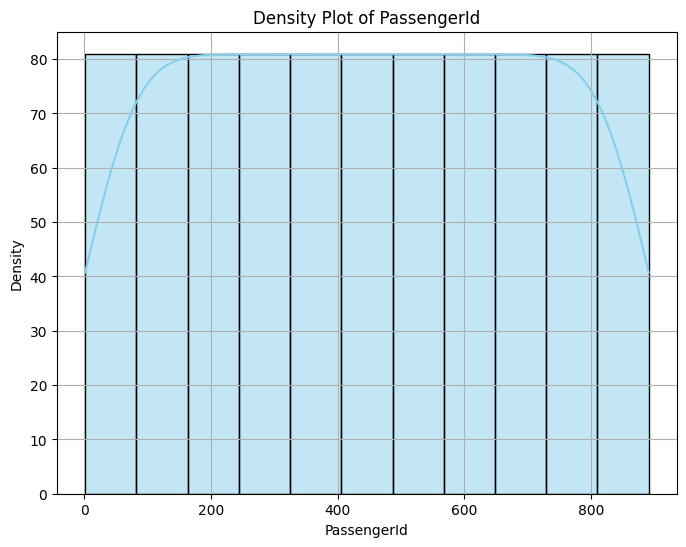

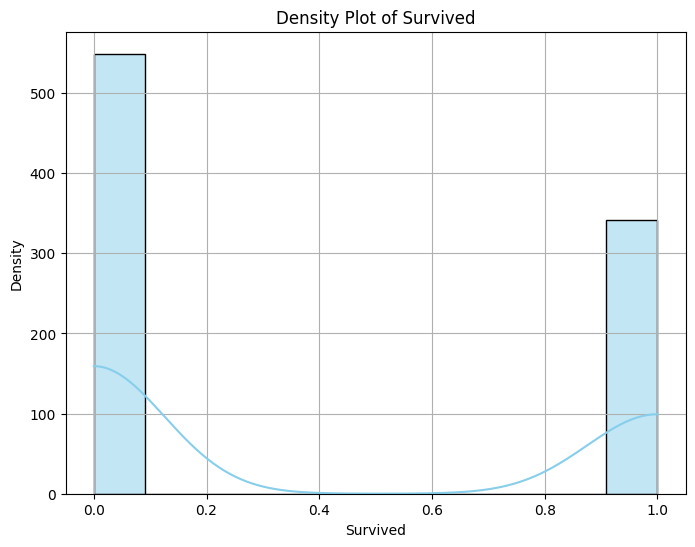

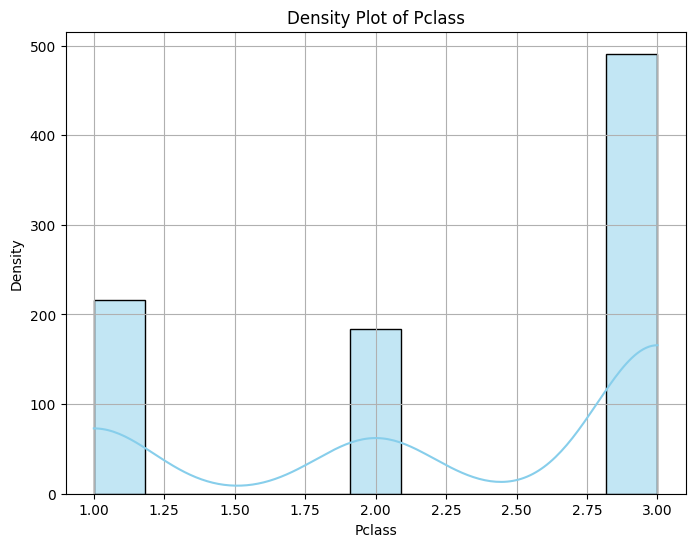

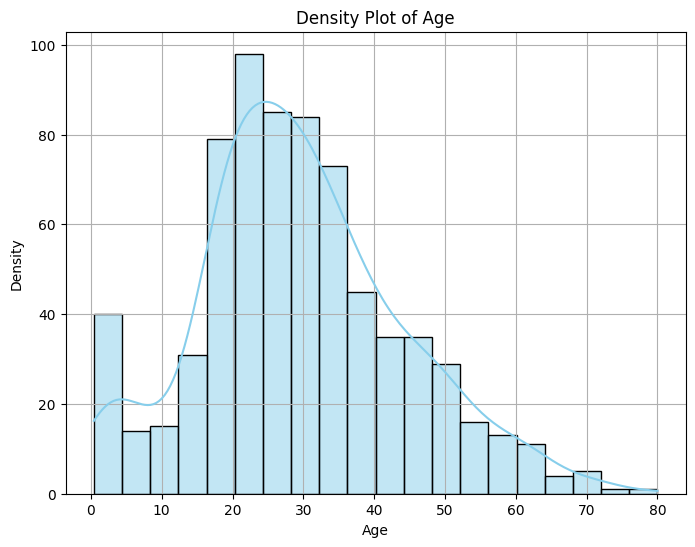

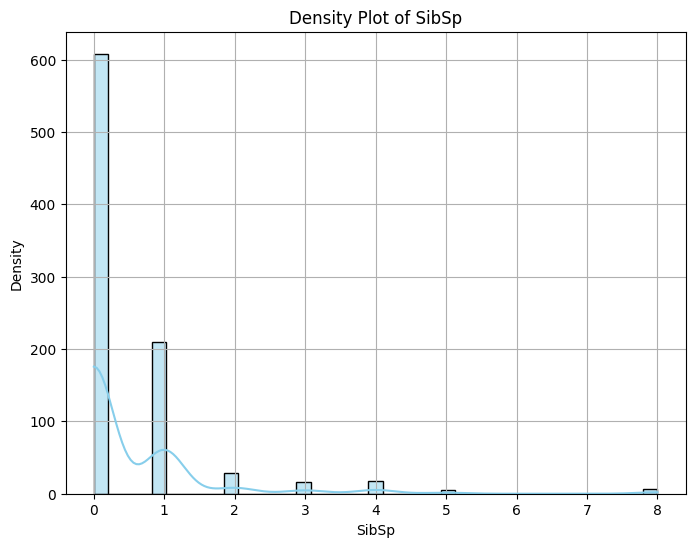

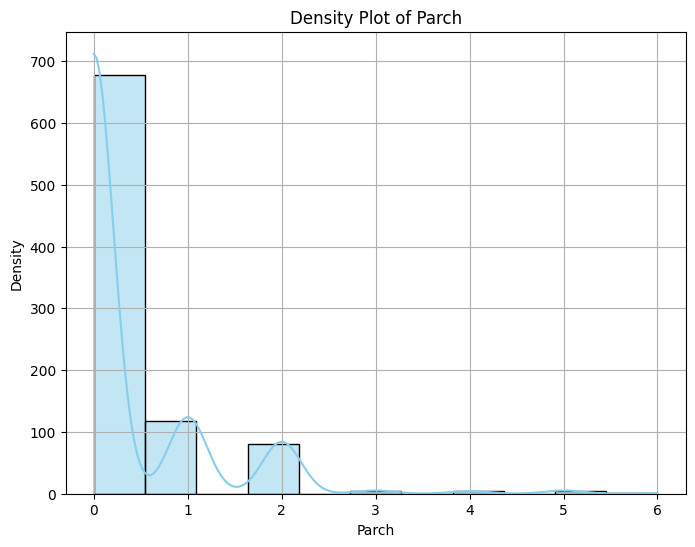

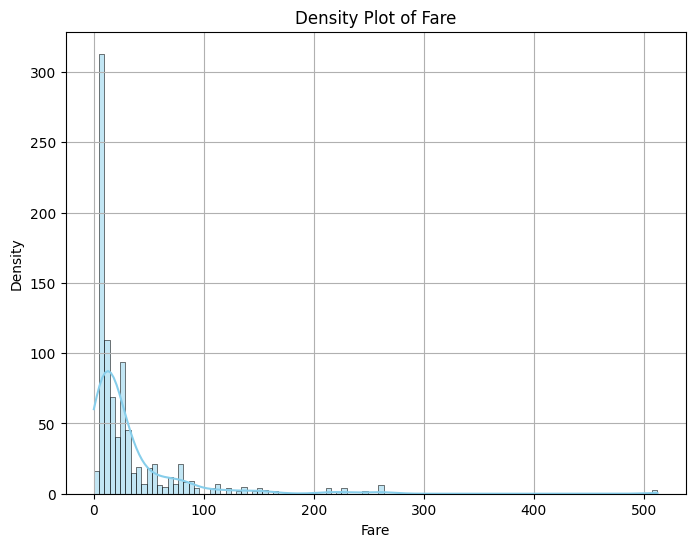

In [89]:
# We have a DataFrame called 'df' with numerical columns
numerical_columns = [col for col in dataset[numerical_features].columns if dataset[numerical_features][col].dtype != 'O']

for numerical_column in numerical_columns:
    # Create a density plot (Kernel Density Estimate) for each numerical column
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[numerical_features][numerical_column], kde=True, color='skyblue')
    plt.title(f'Density Plot of {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


Generate bar plots or pie charts to visualize the distribution of categorical
variables.

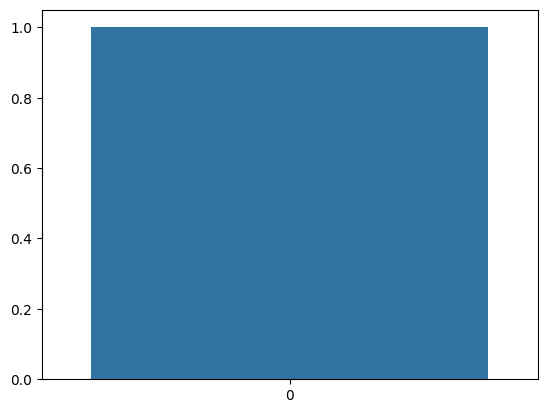

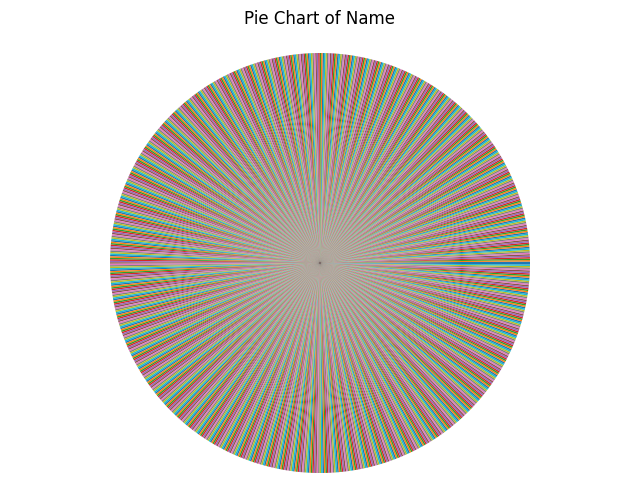

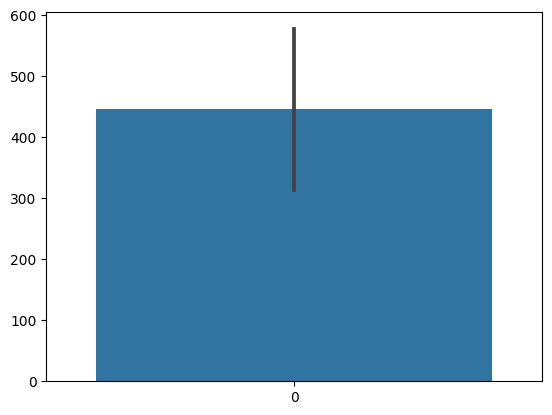

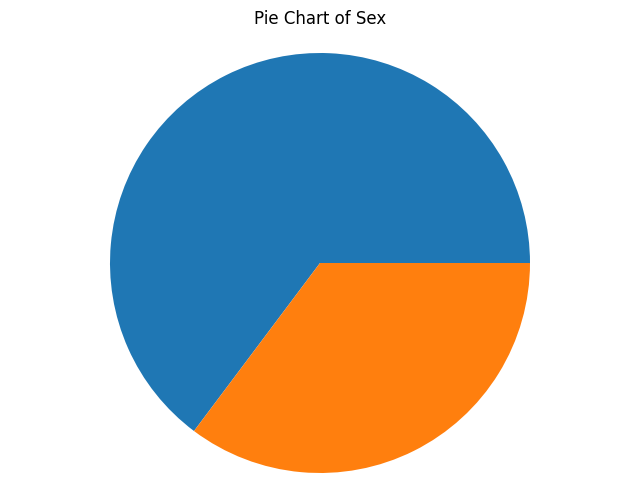

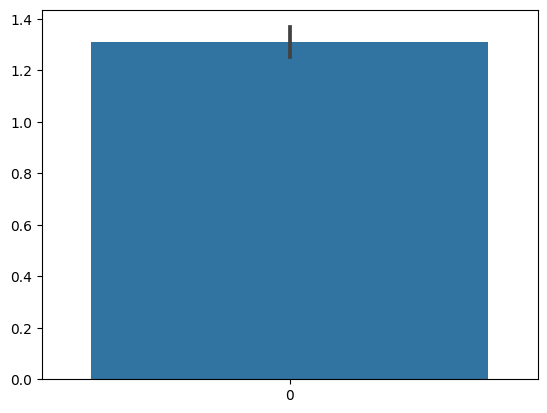

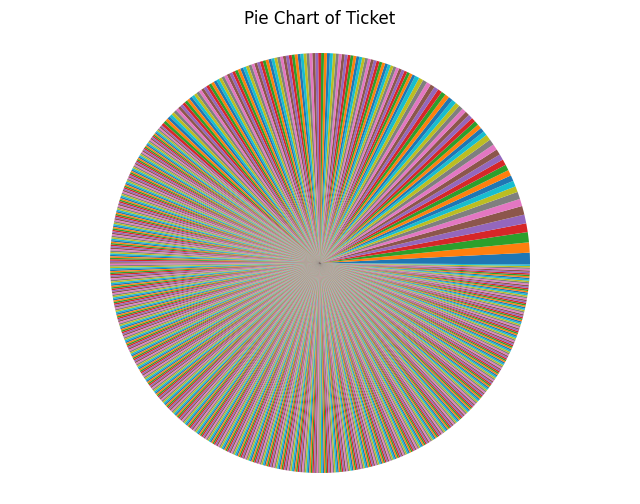

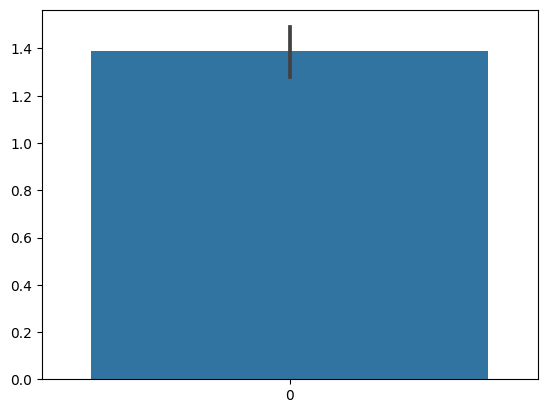

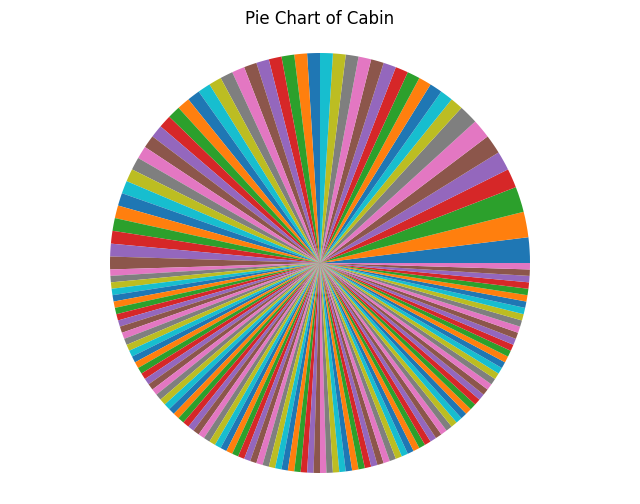

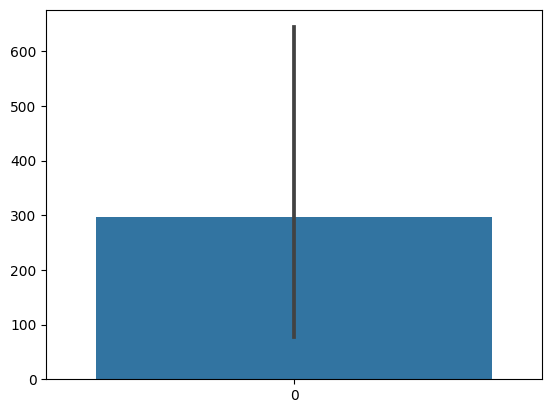

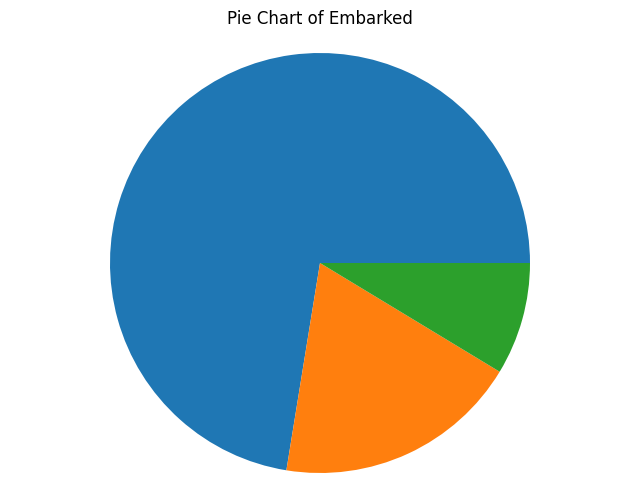

In [93]:
for categorical_column in categorical_features:
    # Count the frequency of unique values in the categorical column
    value_counts = dataset[categorical_column].value_counts()

    # Create a bar chart
    sns.barplot(data = value_counts)
    plt.show()

     # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(value_counts)
    plt.title(f'Pie Chart of {categorical_column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()




Create box plots to identify outliers and understand the spread of data.

In [94]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [100]:
discrete_feature

['Survived', 'Pclass', 'SibSp', 'Parch']

In [96]:
## Continouse Variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


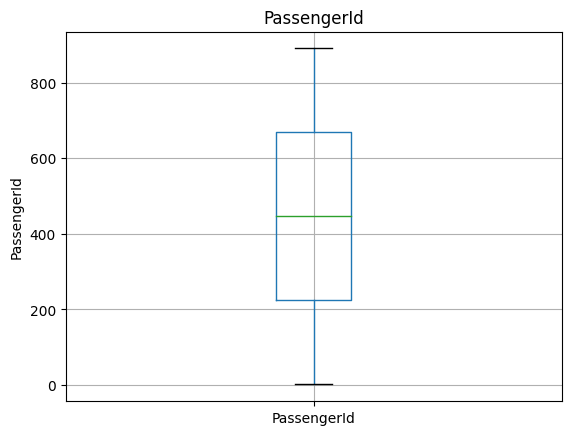

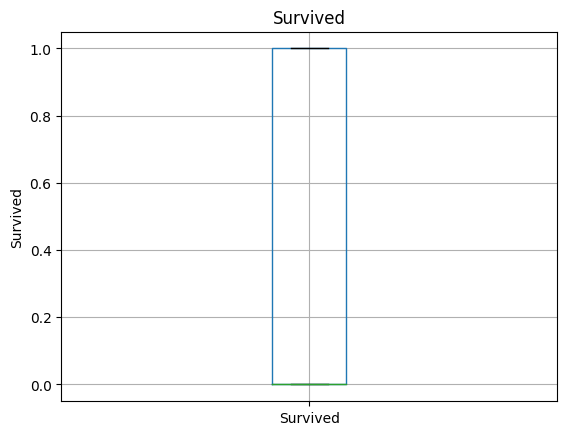

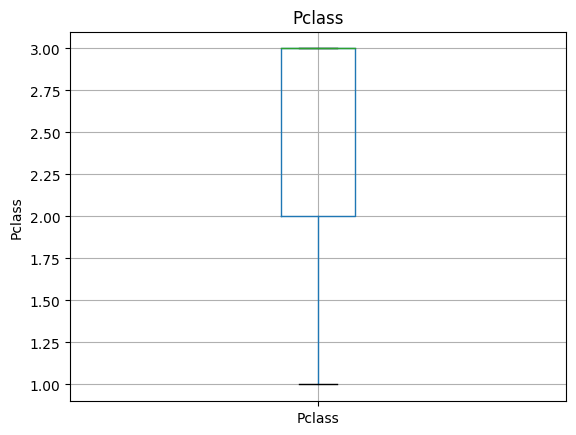

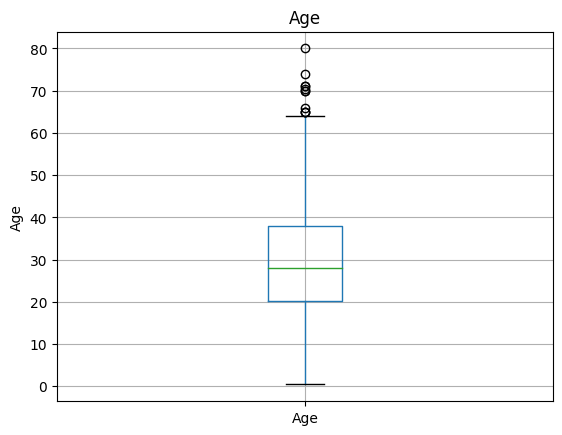

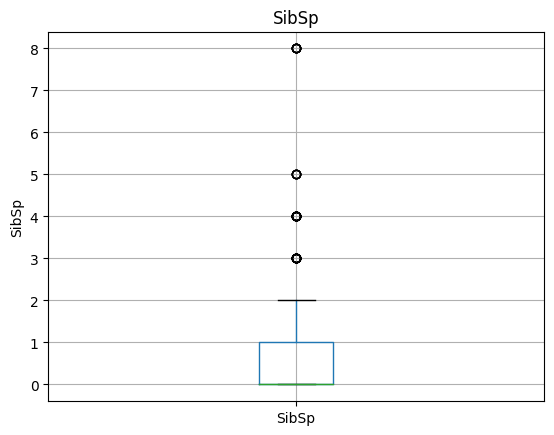

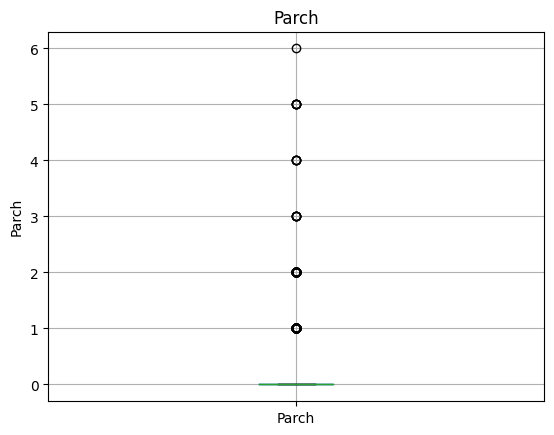

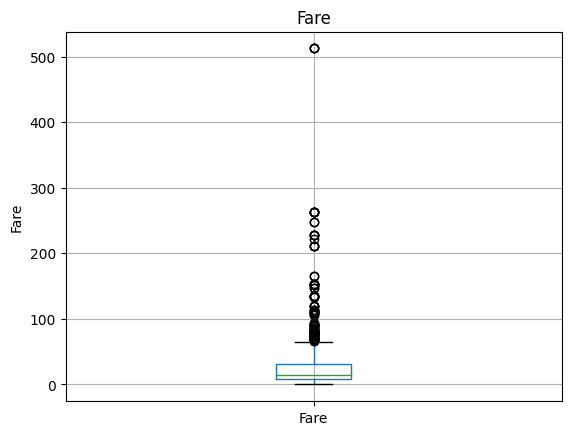

In [102]:
## Outliers (Not handled outlies yet)
for feature in numerical_features:
    data=dataset.copy()
    data[feature]=data[feature]
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Construct scatter plots to explore relationships between pairs of variables.

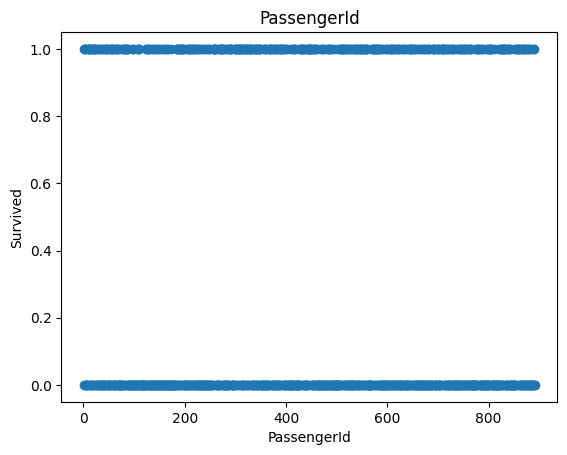

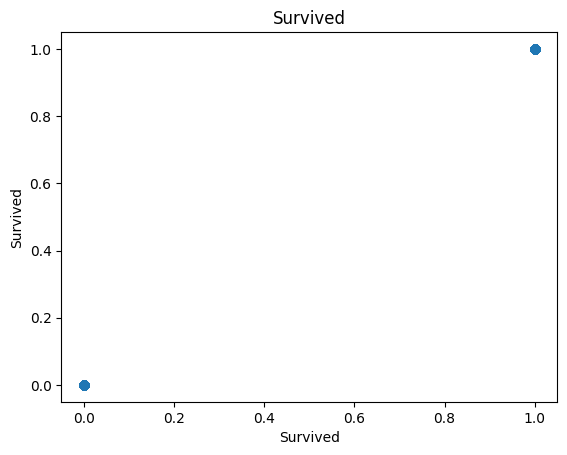

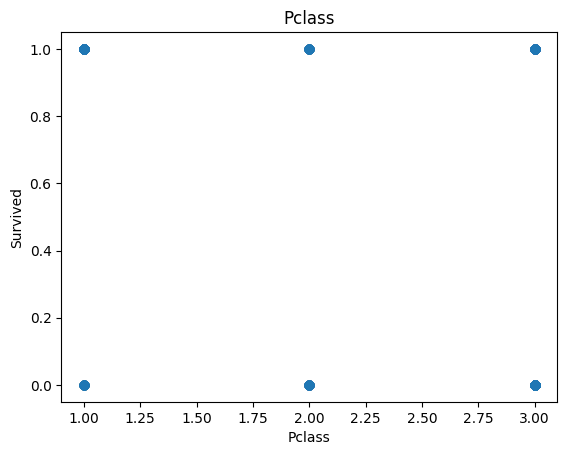

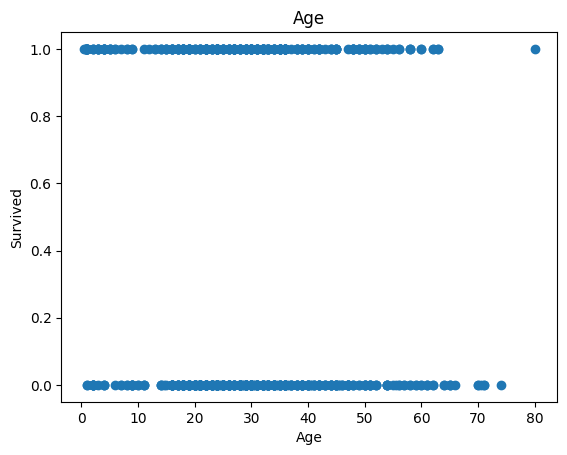

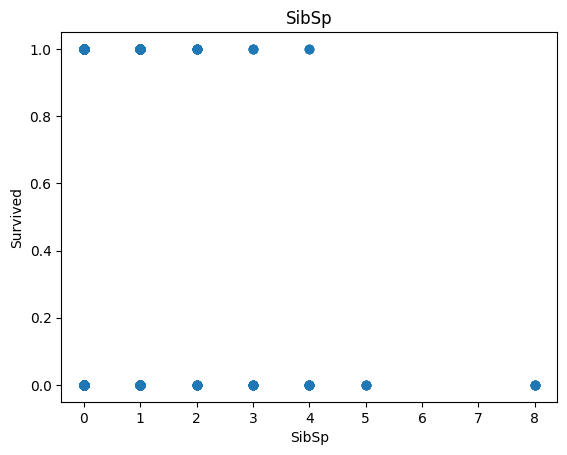

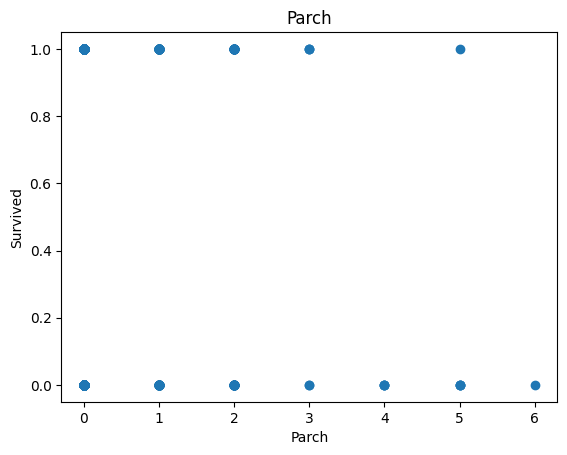

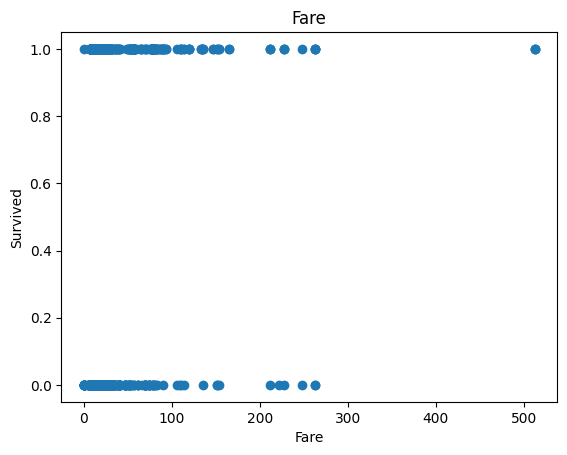

In [103]:
## Scatter plots between numerical features and dependent variables

for feature in numerical_features:
  plt.scatter(data[feature],data['Survived'])
  plt.xlabel(feature)
  plt.ylabel('Survived')
  plt.title(feature)
  plt.show()

Use heatmaps to visualize correlations between variables.

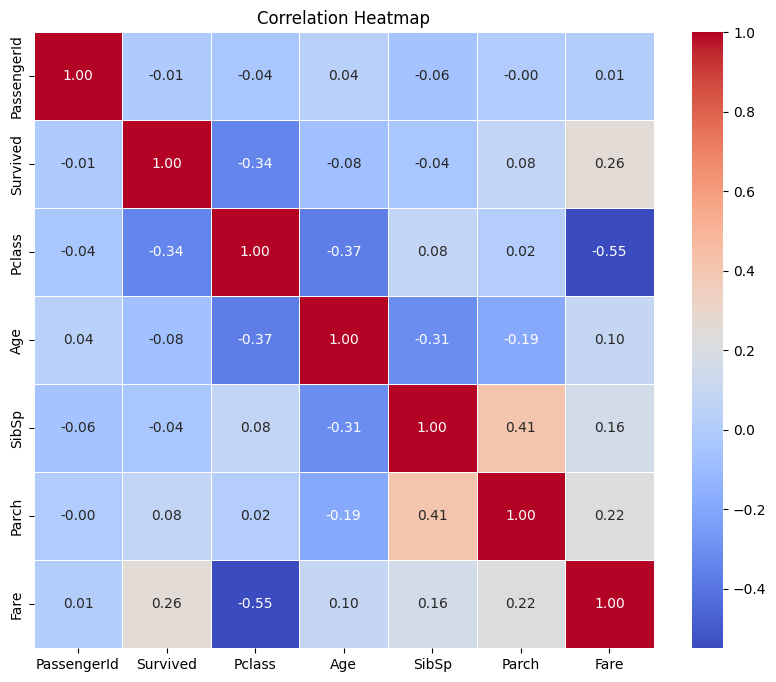

In [105]:
# Assuming you have a DataFrame called 'df' with numerical variables
# Calculate the correlation matrix
correlation_matrix = dataset[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Handling Missing Data:
• Explore the patterns of missing data across variables.

• Decide on an appropriate strategy for handling missing values (imputation,
removal, etc.).

Explore the patterns of missing data across variables.

In [106]:
missing_data = dataset.isna()

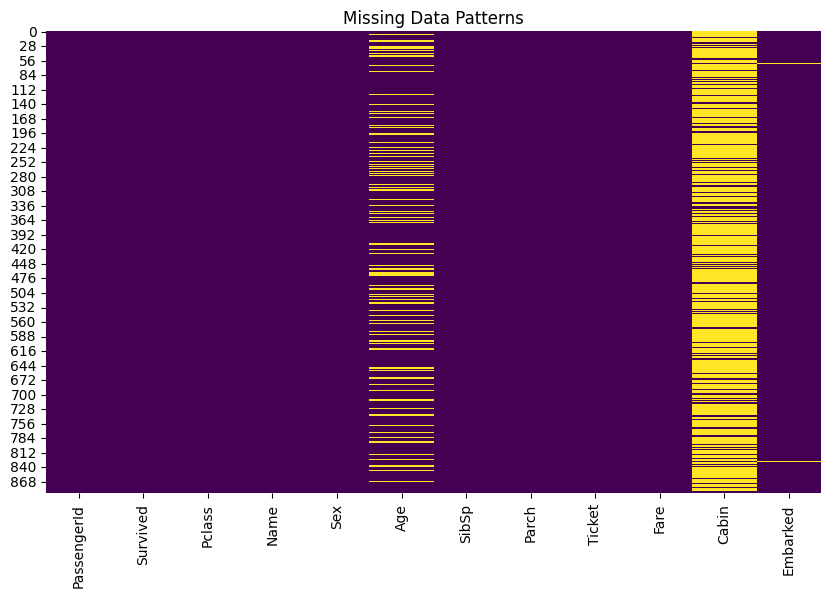

In [107]:
#This heatmap will display missing values as yellow lines. Each row represents a variable, and each column represents an observation.
#You can easily spot patterns and identify which columns have the most missing data.

plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data Patterns')
plt.show()

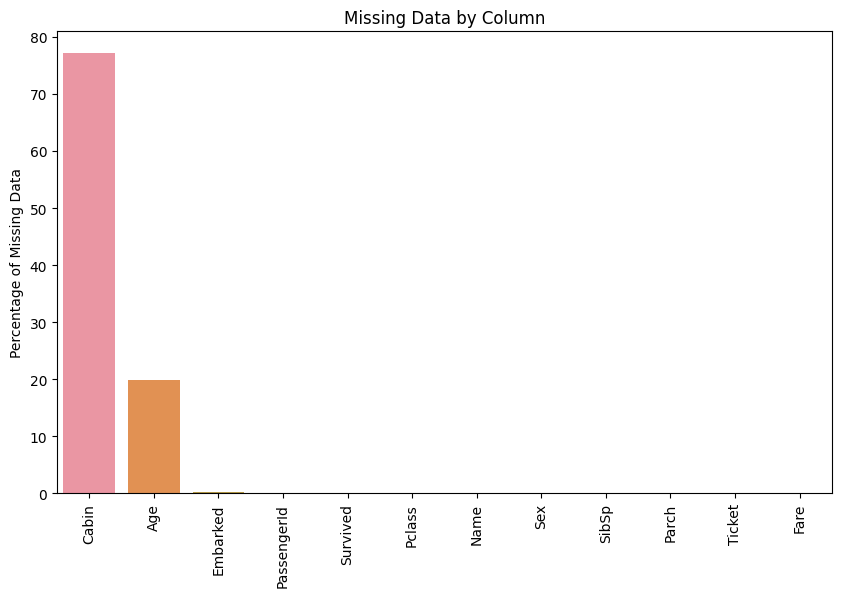

In [108]:
#This bar plot provides a visual representation of the percentage of missing data for each column, helping you identify columns with high missing data.
missing_percentage = (dataset.isna().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data by Column')
plt.show()

In [111]:
# Handle missing values in Age
# Impute with the median
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

# Handle missing values in Cabin
#dataset.drop(columns=['Cabin'], inplace=True)

# Handle missing values in Embarked
# Impute with the mode (most frequent value)
#dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [54]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [112]:
# recheck missing values
print(dataset.isnull().sum())
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 2),  ' % missing values')

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Task 04
## Outlier Detection and Treatment:

• Identify and visualize outliers in numerical variables.

• Decide whether to remove, transform, or treat outliers based on domain
knowledge and analysis goals.

In [146]:
# # Z score
# from scipy import stats
# import numpy as np

# z = np.abs(stats.zscore(dataset['Age']))
# print(z)

# threshold = 2

# # Position of the outlier
# print(np.where(z > 2))


# # IQR
# Q1 = np.percentile(dataset['Age'], 15, method='midpoint')
# Q3 = np.percentile(dataset['Age'], 70, method='midpoint')
# IQR = Q3 - Q1
# print(IQR)


# # Above Upper bound
# upper=Q3+1.5*IQR
# upper_array=np.array(dataset['Age']>=upper)
# print("Upper Bound:",upper)
# print(upper_array.sum())

# #Below Lower bound
# lower=Q1-1.5*IQR
# lower_array=np.array(dataset['Age']<=lower)
# print("Lower Bound:",lower)
# print(lower_array.sum())

# # Removing the outliers
# dataset.drop(index=upper_array, inplace=True)
# dataset.drop(index=lower_array, inplace=True)

# # Print the new shape of the DataFrame
# print("New Shape: ", dataset.shape)

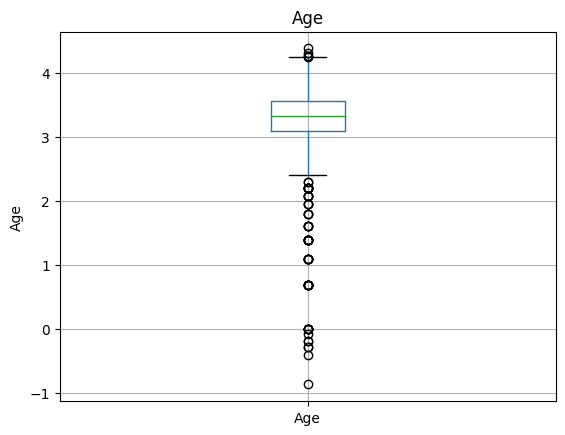

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


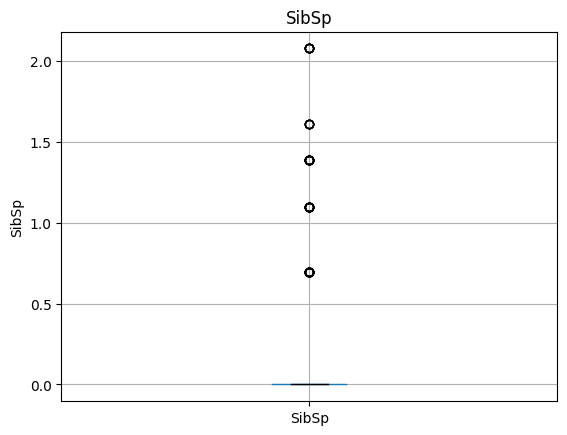

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


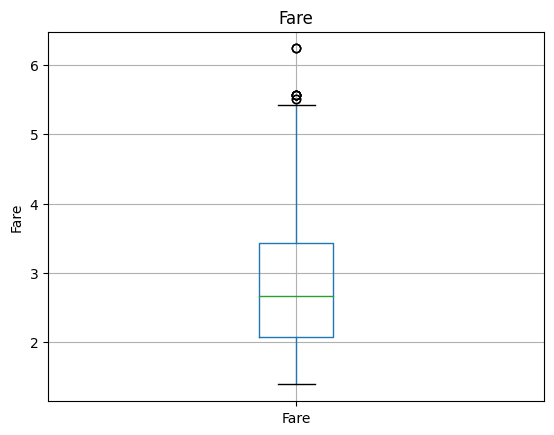

In [147]:
## Outliers
numerical_feature_with_outliers= ['Age', 'SibSp','Fare']
for feature in numerical_feature_with_outliers:
    data=dataset.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# After taking log of values, there are still outliers, so we can drop these columns as these have not much affect on outcome variable

Decide whether to remove, transform, or treat outliers based on domain
knowledge and analysis goals.

## Task 05
Data Distribution Analysis:

• Visualize the data distribution and assess skewness and kurtosis.

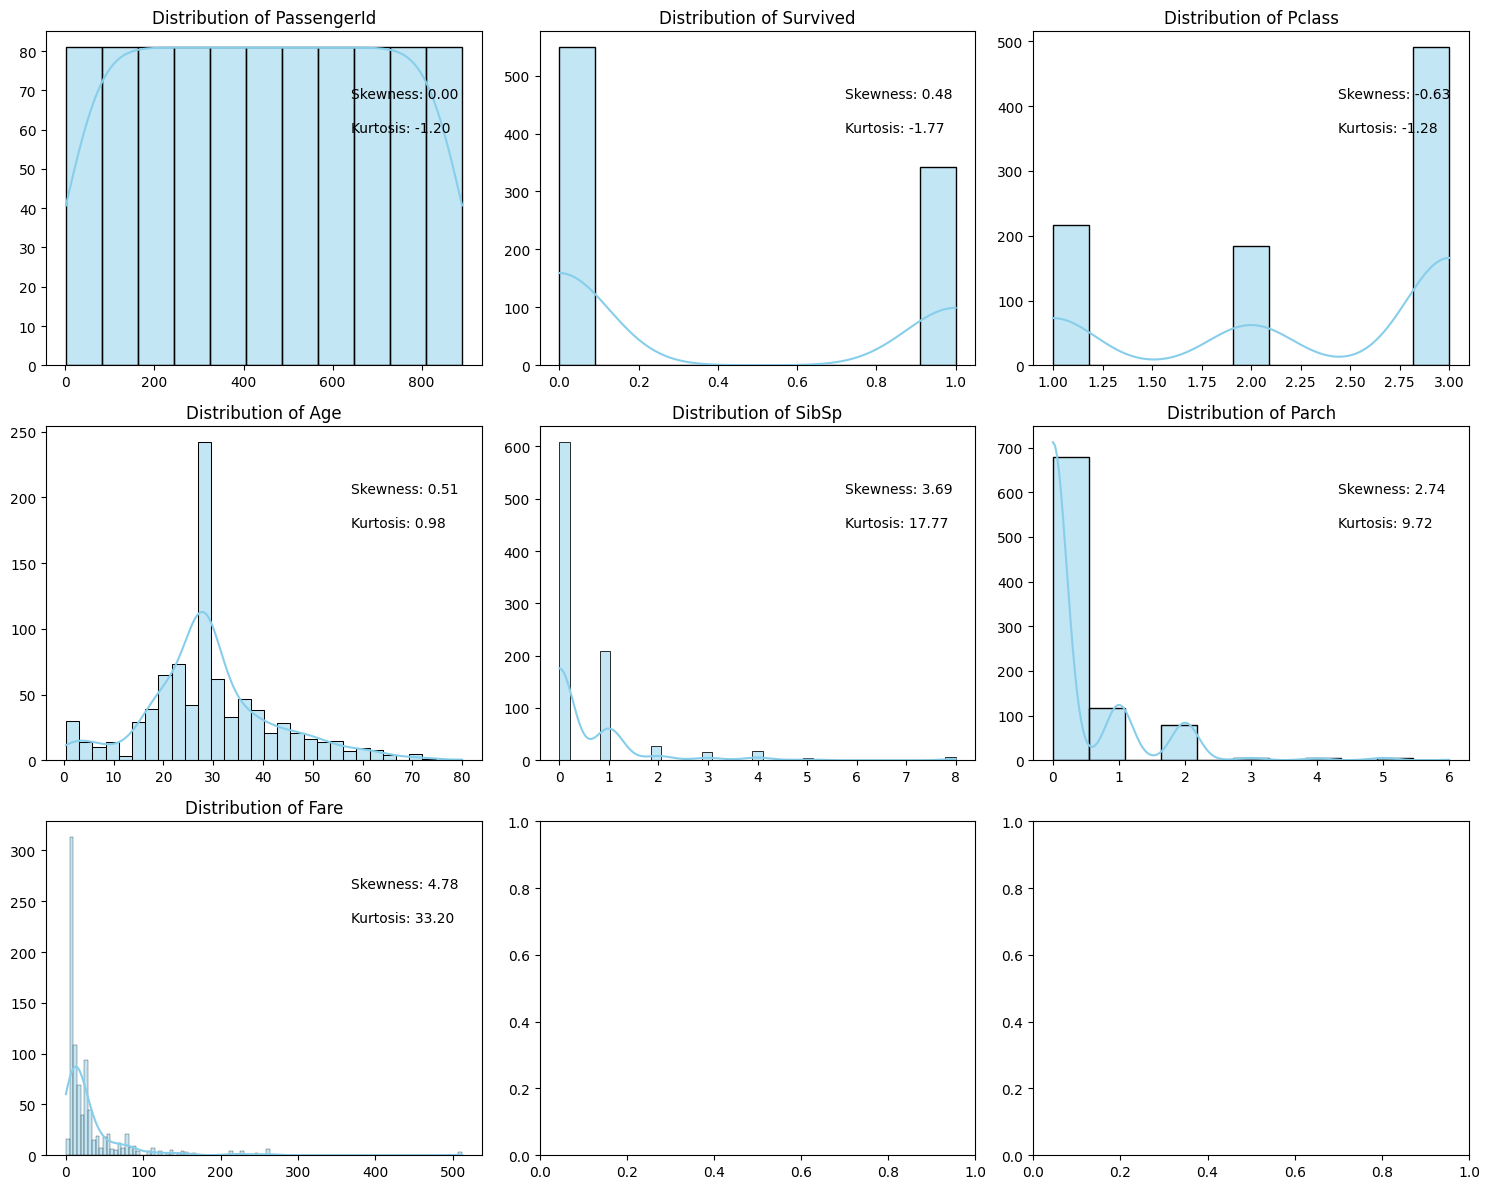

In [148]:
from scipy.stats import skew, kurtosis

# Assuming you have a DataFrame called 'dataset' and a list of numerical features 'numerical_features'

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows needed for subplots
num_rows = (len(numerical_features) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate through numerical features
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    # Plot histogram
    ax = axes[row, col]
    sns.histplot(dataset[feature], ax=ax, kde=True, color='skyblue')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Calculate skewness and kurtosis
    skewness = skew(dataset[feature])
    kurt = kurtosis(dataset[feature])
    ax.text(0.7, 0.8, f'Skewness: {skewness:.2f}', transform=ax.transAxes)
    ax.text(0.7, 0.7, f'Kurtosis: {kurt:.2f}', transform=ax.transAxes)

# Adjust layout
plt.tight_layout()
plt.show()


## Task 06
## Bivariate Analysis (Any two):
• Analyze relationships between pairs of variables through scatter plots.

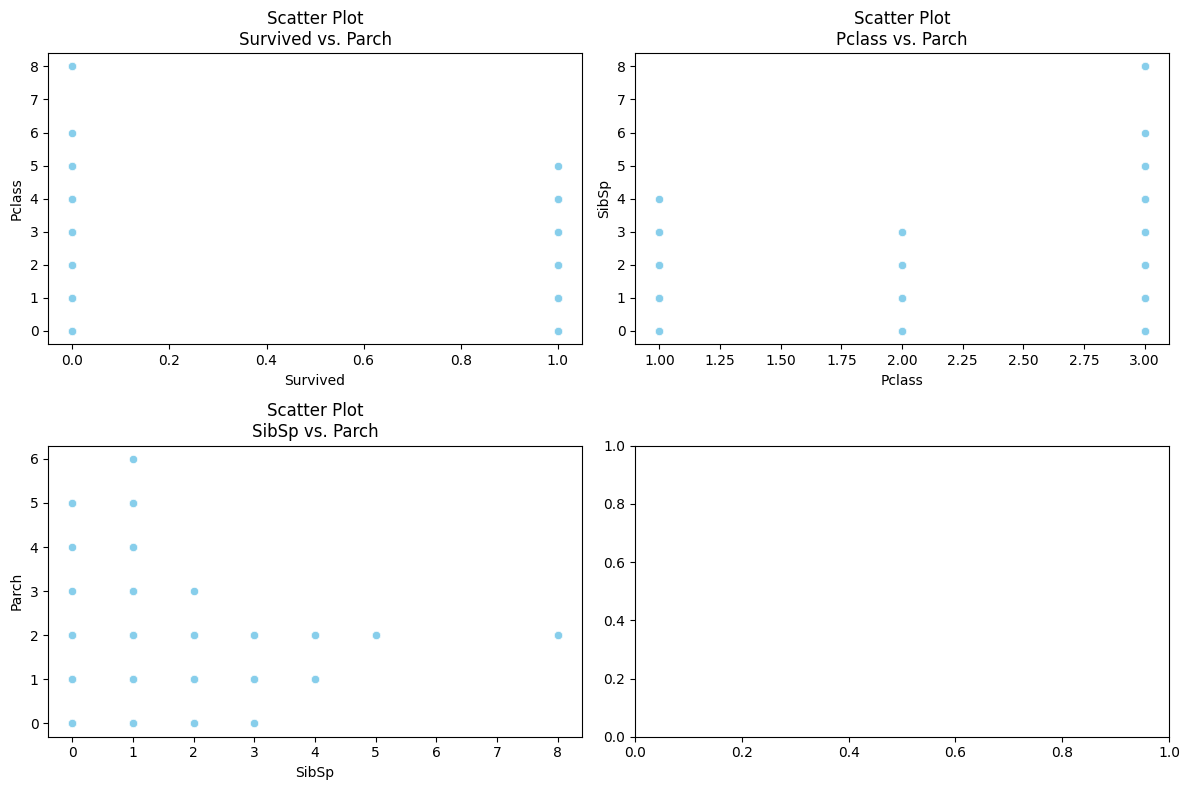

In [149]:
# Assuming you have a DataFrame called 'df' with numerical variables

# List of numerical variables you want to analyze
numerical_variables = discrete_feature

# Set the number of columns for subplots
num_cols = 2

# Calculate the number of rows needed for subplots
num_rows = (len(numerical_variables) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate through pairs of numerical variables
for i, var1 in enumerate(numerical_variables):
    for j, var2 in enumerate(numerical_variables):
        if i < j:
            row = i // num_cols
            col = i % num_cols

            # Create scatter plot
            ax = axes[row, col]
            sns.scatterplot(data=dataset, x=var1, y=var2, ax=ax, color='skyblue')
            ax.set_title(f'Scatter Plot\n{var1} vs. {var2}')

# Adjust layout
plt.tight_layout()
plt.show()


## Task 07
## Grouping and Aggregation:
• Group data by categorical variables and calculate summary statistics within each
group.

• Explore differences or patterns between different groups.

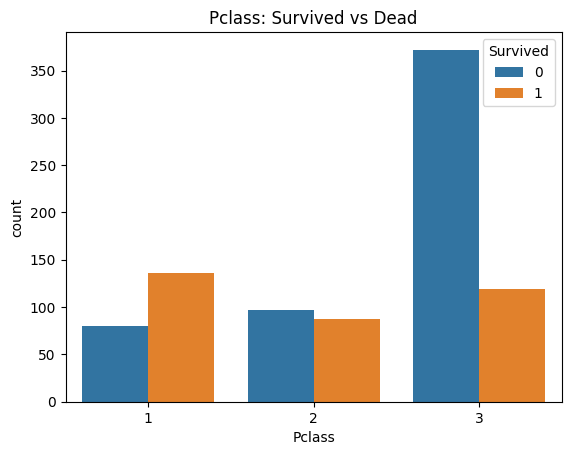

In [150]:
sns.countplot(x='Pclass', hue='Survived', data=dataset)
plt.title('Pclass: Survived vs Dead')
plt.show()

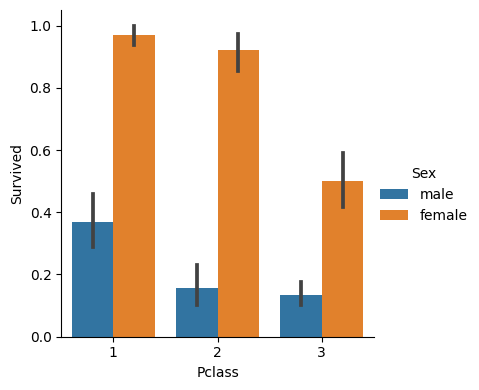

In [151]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=dataset, kind="bar",height=4)
plt.show()

## Task 08
##Data Transformation:
• Apply mathematical transformations (e.g., logarithmic or exponential
transformations) to normalize data.

• Convert categorical variables to numerical format using encoding techniques.

Apply mathematical transformations (e.g., logarithmic or exponential
transformations) to normalize data.

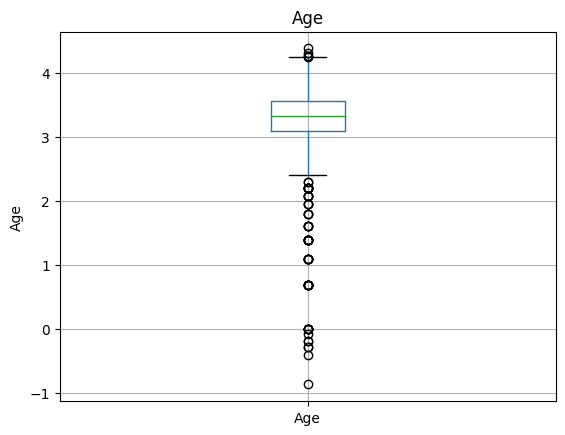

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


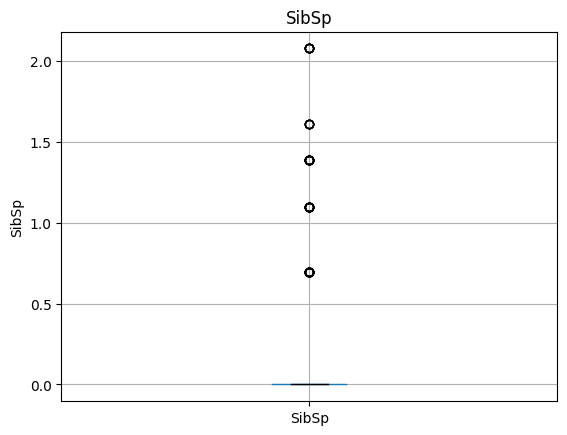

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


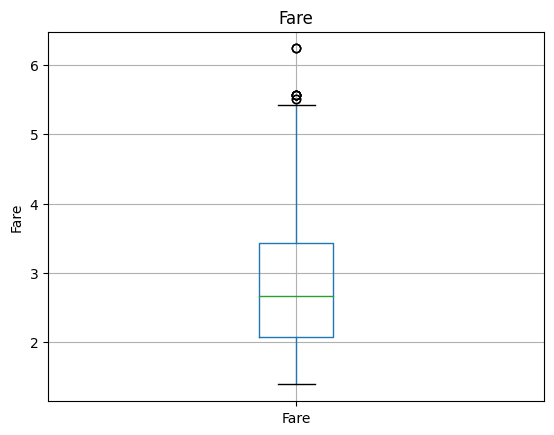

In [152]:
numerical_feature_with_outliers= ['Age', 'SibSp','Fare'] # taking log of values which have more outliers
for feature in numerical_feature_with_outliers:
    data=dataset.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Convert categorical variables to numerical format using encoding techniques.

In [153]:
# Apply one-hot encoding to the categorical features
# Assuming you have a DataFrame called 'dataset' with categorical variables
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
df_encoded = pd.get_dummies(dataset, columns=categorical_features, prefix=categorical_features)

# Display the DataFrame with one-hot encoded features
print(df_encoded) # As there is no unique value in dataset, so every categorical variable is getting 0 numerical value


     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0              1         0       3  22.0      1      0   7.2500   
1              2         1       1  38.0      1      0  71.2833   
2              3         1       3  26.0      0      0   7.9250   
3              4         1       1  35.0      1      0  53.1000   
4              5         0       3  35.0      0      0   8.0500   
..           ...       ...     ...   ...    ...    ...      ...   
886          887         0       2  27.0      0      0  13.0000   
887          888         1       1  19.0      0      0  30.0000   
888          889         0       3  28.0      1      2  23.4500   
889          890         1       1  26.0      0      0  30.0000   
890          891         0       3  32.0      0      0   7.7500   

     Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                           0                                 0   
1                           0                                